<a href="https://colab.research.google.com/github/Kunle-xy/Hackathons/blob/main/MLCAS_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

This challenge is part of the MLCAS2024 workshop. It focuses on the use of satellite imagery datasets to predict genotype-specific plot level yield for the 2023 multi-state maize hybrid trials. The winners will receive cash prizes and will be recognized at the MLCAS 2024 workshop. For more details about MLCAS, please visit our site at 2024 MLCAS.

https://datadryad.org/stash/dataset/doi:10.5061/dryad.905qftttm

####start

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from itertools import combinations
import os
import glob as glob
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import LSTM, Dense, Dropout
#classify date as early, mid, late
# date_collected['Period']
# def classify(date):
#   day = date.day
#   if day <= 15:
#     return 'FIRST-HALF'
#   elif day > 15:
#     return 'SECOND_HALF'

# df['Period'] = df['Date'].apply(classify)

# df['Month'] = df['Date'].dt.month
# tmp = dict(df.groupby('Location')['Month'].min())
# df['Month_Rank'] = df['Month'].apply( lambda x: x + 1 - tmp[df['Location'][0]])
# df['Period'] = df['Month_Rank'].astype(str) + '-MONTH-' + df['Period']
# df['Year'] = df['Date'].dt.year
# df['Year'] = df['Year'].astype(str)

# # Drop the Month_Rank column as it is no longer needed
# df = df.drop(columns=['Month_Rank'])

# df


In [2]:
#change osdir
file_path_os = '/content/drive/MyDrive/MLCAS/MLCAS24_Competition_data'
os.chdir(file_path_os)

In [ ]:
ls

checkpoints/
MISC/
model.txt
processed_3t_10k.parquet
processed_3t_1k.parquet
processed_3t_20k.parquet
processed_3t_2k.parquet
processed_3t_5k.parquet
processed_3t.parquet
shrestha-et-al-2024-plot-level-satellite-imagery-can-substitute-for-uavs-in-assessing-maize-phenotypes-across.pdf
train/
train_2023_2022_model_2t.csv
train_2023_2022_model_3t_10000_sample.parquet
train_2023_2022_model_3t_1000_sample.parquet
train_2023_2022_model_3t_10k_sample.parquet
train_2023_2022_model_3t_20000_sample.parquet
train_2023_2022_model_3t_2k_sample.parquet
train_2023_2022_model_3t_400_sample.csv
train_2023_2022_model_3t_400_sample.parquet
train_2023_2022_model_3t_5000_sample.parquet
train_2023_2022_model_3t.csv
train_2023_2022_model_4t.csv
validation/
validation_3t_2023.parquet


#### train_2023


In [ ]:
#change dir to 2023
year = '2023'
file_path = f'train/{year}/{year}/DataPublication_final/'
date_collected_path = file_path + 'GroundTruth/DateofCollection.xlsx'
df = pd.read_excel(date_collected_path)

# os.chdir(file_path)

#### image file compilations for time=2,3,4

In [ ]:
year = '2023'
file_path = f'train/{year}/{year}/DataPublication_final/'
date_collected_path = file_path + 'GroundTruth/DateofCollection.xlsx'
df = pd.read_excel(date_collected_path)

data = df.copy()
if year == '2023':
  data = data[data['Location'] != 'Ames']

elements = data.groupby('Location')['time'].unique()

#reset index
elements = elements.reset_index()
combination_length = 3
locations = list(elements['Location'].unique())

ref_dict ={}

for item in locations:
    element = elements[elements['Location'] == item]['time'].values[0]  # Extract the unique 'time' values array
    combos = list(combinations(element, combination_length))
    ref_dict[item] = combos

rows = []

# Iterate over the location_combinations dictionary and create a row for each combination
for location, combos in ref_dict.items():
    for combo in combos:
        rows.append({'Location': location, 'Combination': combo, 'Year':year})

#create datafreame:

ref_df_2023 = pd.DataFrame(rows)
ref_df_2023

,Location,Combination,Year
0,MOValley,"(TP1, TP2, TP3)",2023
1,MOValley,"(TP1, TP2, TP4)",2023
2,MOValley,"(TP1, TP3, TP4)",2023
3,MOValley,"(TP2, TP3, TP4)",2023


In [ ]:
year = '2022'
file_path = f'train/{year}/{year}/DataPublication_final/'
date_collected_path = file_path + 'GroundTruth/DateofCollection.xlsx'
df = pd.read_excel(date_collected_path)

data = df.copy()
if year == '2023':
  data = data[data['Location'] != 'Ames']

elements = data.groupby('Location')['time'].unique()

#reset index
elements = elements.reset_index()
combination_length = 3
locations = list(elements['Location'].unique())

ref_dict ={}

for item in locations:
    element = elements[elements['Location'] == item]['time'].values[0]  # Extract the unique 'time' values array
    combos = list(combinations(element, combination_length))
    ref_dict[item] = combos

rows = []

# Iterate over the location_combinations dictionary and create a row for each combination
for location, combos in ref_dict.items():
    for combo in combos:
        rows.append({'Location': location, 'Combination': combo, 'Year':year})

#create datafreame:

ref_df_2022 = pd.DataFrame(rows)
ref_df_2022

,Location,Combination,Year
0,Ames,"(TP1, TP2, TP3)",2022
1,Ames,"(TP1, TP2, TP4)",2022
2,Ames,"(TP1, TP2, TP5)",2022
3,Ames,"(TP1, TP2, TP6)",2022
4,Ames,"(TP1, TP3, TP4)",2022
...,...,...,...
115,Scottsbluff,"(TP2, TP5, TP6)",2022
116,Scottsbluff,"(TP3, TP4, TP5)",2022
117,Scottsbluff,"(TP3, TP4, TP6)",2022
118,Scottsbluff,"(TP3, TP5, TP6)",2022


In [ ]:
#concate
combined_df = pd.concat([ref_df_2022, ref_df_2023], axis=0).reset_index(drop=True)
combined_df

,Location,Combination,Year
0,Ames,"(TP1, TP2, TP3)",2022
1,Ames,"(TP1, TP2, TP4)",2022
2,Ames,"(TP1, TP2, TP5)",2022
3,Ames,"(TP1, TP2, TP6)",2022
4,Ames,"(TP1, TP3, TP4)",2022
...,...,...,...
119,Scottsbluff,"(TP4, TP5, TP6)",2022
120,MOValley,"(TP1, TP2, TP3)",2023
121,MOValley,"(TP1, TP2, TP4)",2023
122,MOValley,"(TP1, TP3, TP4)",2023


In [ ]:
long_row = []
combined_file = []
each_cmb_file = []
for index, row in combined_df.iterrows():
    location = row['Location']
    combination = row['Combination']
    year = row['Year']
    # print(combination)
    # break
    for item in combination:
      if location == 'Missouri Valley':
        location = 'MOValley'
      try:
        file_path_tmp = os.path.join(file_path_os,f'train/{year}/{year}/DataPublication_final/Satellite/{location}/{item}')
        tmp = glob.glob(os.path.join(file_path_tmp, '*'))
        tmp.sort()
        each_cmb_file.append(tmp)
        path_to_files = os.listdir(file_path_tmp)
      except:
        continue
    for files in zip(*each_cmb_file):
      # print(files)
      long_row.append({'Location': location, 'Combination': combination, 'Year':year, 'File_path': files})

    # combined_file.append(each_cmb_file)
    each_cmb_file = []







In [ ]:
dataframe = pd.DataFrame(long_row)
# dataframe.iloc[0,:]
# convert to csv
dataframe.iloc[1009,:]['File_path']
# len(dataframe)

('/content/drive/MyDrive/MLCAS/MLCAS24_Competition_data/train/2022/2022/DataPublication_final/Satellite/Ames/TP1/Ames-TP1-4232_4_18.TIF',
 '/content/drive/MyDrive/MLCAS/MLCAS24_Competition_data/train/2022/2022/DataPublication_final/Satellite/Ames/TP2/Ames-TP2-4232_4_18.TIF',
 '/content/drive/MyDrive/MLCAS/MLCAS24_Competition_data/train/2022/2022/DataPublication_final/Satellite/Ames/TP4/Ames-TP4-4232_4_18.TIF')

In [ ]:
#save to csv
dataframe.to_csv('train_2023_2022_model_3t.csv', index=False)
# dataframe.to_csv('train_2023_2022_model_2t.csv', index=False)
# dataframe.to_csv('train_2023_2022_model_4t.csv', index=False)

#### features extraction and concatenation





##### function and import

In [ ]:
!pip install rasterio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 55.5 MB/s eta 0:00:00


In [ ]:
import torch
import torch.nn as nn
import numpy as np
import rasterio
import pandas as pd

def norm(band):
    band_min, band_max = band.min(), band.max()
    return ((band - band_min) / (band_max - band_min))

def safe_divide(numerator, denominator):
    with np.errstate(divide='ignore', invalid='ignore'):
        result = np.divide(numerator, denominator)
        if np.isscalar(result):
            return result if np.isfinite(result) else 0.0
        else:
            result[~np.isfinite(result)] = 0  # -inf, inf, NaN to 0
    return result


class VegetativeCNN(nn.Module):
    def __init__(self, image, input_channels=6):
        super(VegetativeCNN, self).__init__()
        # First convolutional layer
        self.height = image.shape[2]
        self.width = image.shape[3]
        self.conv1 = nn.Conv2d(input_channels, 32, kernel_size=3, padding=1)
        # Second convolutional layer
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)

        # Fully connected layers (FC)
        # Adjust the size of the input to the first fully connected layer based on the image size
        self.fc1 = nn.Linear(64 * self.height * self.width, 128)  # Adjusted for the input size
        self.fc2 = nn.Linear(128, 32)

    def forward(self, x):
        # Apply the first convolutional layer followed by ReLU
        x = torch.relu(self.conv1(x))

        # Apply the second convolutional layer followed by ReLU
        x = torch.relu(self.conv2(x))

        # Flatten the tensor for the fully connected layers
        x = x.view(x.size(0), -1)

        # Apply the fully connected layers with ReLU activation
        x = torch.relu(self.fc1(x))
        x = self.fc2(x)

        return x


def satelliteimage_with_cnn(inputpath):
    color = []

    with rasterio.open(inputpath, 'r') as src:
        # Read the entire image
        S_images = src.read()

        # Normalize or clip the image bands
        S_images = np.clip(S_images, 0, np.finfo(np.float32).max)

        # Convert to a PyTorch tensor and add batch dimension
        S_images_tensor = torch.tensor(S_images, dtype=torch.float32).unsqueeze(0)


        # Pass the entire image through the CNN
        model = VegetativeCNN(S_images_tensor, input_channels=6)
        cnn_features = model(S_images_tensor).detach().numpy().flatten()

        # Compute vegetative indices for the entire image
        r, g, b, nir, re, db = S_images[0], S_images[1], S_images[2], S_images[3], S_images[4], S_images[5]

        GLI = safe_divide((2 * g - r - b), (2 * g + r + b)).mean()
        GRVI = safe_divide((g.astype(float) - r.astype(float)), (g.astype(float) + r.astype(float))).mean()
        NGRDI = safe_divide((r.astype(float) - g.astype(float)), (r.astype(float) + g.astype(float))).mean()
        NDVI = safe_divide((nir.astype(float) - r.astype(float)), (nir.astype(float) + r.astype(float))).mean()
        GNDVI = safe_divide((nir.astype(float) - g.astype(float)), (nir.astype(float) + g.astype(float))).mean()
        SAVI = safe_divide(1.5 * (nir.astype(float) - r.astype(float)), (nir.astype(float) + r.astype(float) + 0.5)).mean()
        NDRE = safe_divide((nir.astype(float) - re.astype(float)), (nir.astype(float) + re.astype(float))).mean()
        EVIupper = 2.5 * (nir - r)
        EVIlower = (nir + 6 * r - 7.5 * b + 1)
        EVI = safe_divide(EVIupper, EVIlower).mean()
        MSAVIupper = 2 * nir + 1 - np.sqrt(np.clip((2 * nir + 1) ** 2 - 8 * (nir - r), 0, np.finfo(np.float32).max))
        MSAVI = safe_divide(MSAVIupper, 2).mean()

        vegetative_features = np.array([GLI, GRVI, NGRDI, NDVI, GNDVI, SAVI, NDRE, EVI, MSAVI])

        # Concatenate Vegetative and CNN Features
        combined_features = np.concatenate((vegetative_features.flatten(), cnn_features))

        color.append(
            {'Imagename': os.path.basename(inputpath),
             'Combined_Features': combined_features}
        )

    # band_values = pd.DataFrame(color)

    return np.array(combined_features)



In [ ]:

from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
scaler = StandardScaler()

# Example usage
inputpath = '/content/drive/MyDrive/MLCAS/MLCAS24_Competition_data/train/2022/2022/DataPublication_final/Satellite/Ames/TP1/Ames-TP1-4232_4_18.TIF'  # Replace with your actual file path
features = satelliteimage_with_cnn(inputpath)
len(features)
# print("Features:", features
# features_reshaped = features.reshape(-1, 1)
# scaled_features = scaler.fit_transform(features_reshaped)
# print("Scaled Features:", scaled_features)
#histogram
# plt.hist(features[9:], bins=len(features))
# plt.show()

41

In [ ]:
features[:9], features[9:]/features[9:].max()

(array([ 0.12150043,  0.1134943 , -0.1134943 ,  0.67194026,  0.61964222,
         1.00778896,  0.28070909,  2.49447817,  0.77384044]),
 array([ 0.31340087, -0.50428294, -0.0821502 , -0.86996356, -0.28514194,
         0.8563556 ,  0.02371829,  0.28041637, -0.62401574, -0.75787218,
         0.14981033, -0.75010663,  0.20458887, -0.04878651, -0.40175217,
         0.55935559,  0.37093165, -0.19089184,  0.59686683, -0.04808945,
        -0.52712907, -0.01738645, -0.47961942,  0.93777271, -0.15121188,
         0.43753583, -0.15493947,  0.42175938,  0.15834349,  0.35916488,
         0.13710998,  0.00215982,  0.16225182, -0.20839881,  0.5239159 ,
         0.57303958, -0.07722711,  0.44785288, -0.36663065, -0.23926941,
        -0.19153765,  0.10358643,  0.48277685, -0.09282249,  1.        ,
        -1.14939588,  0.20559179,  0.56252083,  0.43134577, -0.14468731,
         0.07526038,  0.43483359,  0.79050318, -0.21816536, -0.03097621,
        -0.45851393, -0.06956594, -0.02557408, -0.2507697 , -0

######old


In [ ]:
#join df_2022 and 2023
# df = df_2023.merge(df_2022, on=['Period'], how='left')
!pip install rasterio
import pandas as pd
import matplotlib.pyplot as plt
import cv2 as cv
import rasterio
import os
import glob
import warnings
import random
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

def norm(band):
    band_min, band_max = band.min(), band.max()
    return ((band - band_min) / (band_max - band_min))

def safe_divide(numerator, denominator):
    with np.errstate(divide='ignore', invalid='ignore'):
        result = np.divide(numerator, denominator)
        if np.isscalar(result):
            return result if np.isfinite(result) else 0.0
        else:
            result[~np.isfinite(result)] = 0  # -inf, inf, NaN to 0
    return result

def satelliteimage(inputpath):
    color = []
    with rasterio.open(inputpath, 'r') as src:
        S_images = src.read()

        h = src.height
        w = src.width

        Image = os.path.basename(inputpath)
        count = 0
        for height in range(h):
            for width in range(w):
                r, g, b, nir, re, db = src.read(1)[height, width], src.read(2)[height, width], src.read(3)[height, width], src.read(4)[height, width], src.read(5)[height, width], src.read(6)[height, width]

                r = np.clip(r, 0, np.finfo(np.float32).max)
                g = np.clip(g, 0, np.finfo(np.float32).max)
                b = np.clip(b, 0, np.finfo(np.float32).max)
                nir = np.clip(nir, 0, np.finfo(np.float32).max)
                re = np.clip(re, 0, np.finfo(np.float32).max)
                db = np.clip(db, 0, np.finfo(np.float32).max)

                GLI = safe_divide((2 * g - r - b), (2 * g + r + b))

                GRVI = safe_divide((g.astype(float) - r.astype(float)), (g.astype(float) + r.astype(float)))

                NGRDI = safe_divide((r.astype(float) - g.astype(float)), (r.astype(float) + g.astype(float)))

                NDVI = safe_divide((nir.astype(float) - r.astype(float)), (nir.astype(float) + r.astype(float)))

                GNDVI = safe_divide((nir.astype(float) - g.astype(float)), (nir.astype(float) + g.astype(float)))

                SAVI = safe_divide(1.5 * (nir.astype(float) - r.astype(float)), (nir.astype(float) + r.astype(float) + 0.5))

                NDRE = safe_divide((nir.astype(float) - re.astype(float)), (nir.astype(float) + re.astype(float)))

                # Additional Indices
                EVIupper = 2.5 * (nir - r)
                EVIlower = (nir + 6 * r - 7.5 * b + 1)
                EVI = safe_divide(EVIupper, EVIlower)

                MSAVIupper = 2 * nir + 1 - np.sqrt(np.clip((2 * nir + 1) ** 2 - 8 * (nir - r), 0, np.finfo(np.float32).max))
                MSAVI = safe_divide(MSAVIupper, 2)

                color.append(
                    {'Imagename': Image,
                     'Red': r,
                     'Green': g,
                     'Blue': b,
                     'GLI': GLI,
                     'GRVI': GRVI,
                     'NGRDI': NGRDI,
                     'NDVI': NDVI,
                     'GNDVI': GNDVI,
                     'SAVI': SAVI,
                     'NDRE': NDRE,
                     'EVI': EVI,
                     'MSAVI': MSAVI,
                     'RedEdge': re,
                     'DeepBlue': db,
                     'Nir': nir
                    }
                )
    band_values = pd.DataFrame(color)
    band_values = band_values.loc[band_values['Red'] > 0]  # Remove the pixel values that are equal to zero

    # Ensure all columns except 'Imagename' are numeric
    for col in band_values.columns:
        if col != 'Imagename':
            band_values.loc[:, col] = pd.to_numeric(band_values[col], errors='coerce')

    band_values = band_values.groupby('Imagename')[list(band_values.describe().columns)].agg(['mean', 'median', 'sum']).reset_index()
    band_values.columns = band_values.columns.map('_'.join)

    return band_values.loc[:, band_values.columns != 'Imagename_'].values.flatten()







   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.5/21.5 MB 32.9 MB/s eta 0:00:00


In [ ]:
satelliteimage(inputpath)

#####continue

In [ ]:
#TODO

#0. use Norm sclaer
#1. Use convolution alongside tghe features

In [ ]:
df = pd.read_csv('train_2023_2022_model_3t.csv')
df.head()
len(df)

49436

In [ ]:
df

,Location,Combination,Year,File_path
0,Ames,"('TP1', 'TP2', 'TP3')",2022,('/content/drive/MyDrive/MLCAS/MLCAS24_Competi...
1,Ames,"('TP1', 'TP2', 'TP3')",2022,('/content/drive/MyDrive/MLCAS/MLCAS24_Competi...
2,Ames,"('TP1', 'TP2', 'TP3')",2022,('/content/drive/MyDrive/MLCAS/MLCAS24_Competi...
3,Ames,"('TP1', 'TP2', 'TP3')",2022,('/content/drive/MyDrive/MLCAS/MLCAS24_Competi...
4,Ames,"('TP1', 'TP2', 'TP3')",2022,('/content/drive/MyDrive/MLCAS/MLCAS24_Competi...
...,...,...,...,...
49431,MOValley,"('TP2', 'TP3', 'TP4')",2023,('/content/drive/MyDrive/MLCAS/MLCAS24_Competi...
49432,MOValley,"('TP2', 'TP3', 'TP4')",2023,('/content/drive/MyDrive/MLCAS/MLCAS24_Competi...
49433,MOValley,"('TP2', 'TP3', 'TP4')",2023,('/content/drive/MyDrive/MLCAS/MLCAS24_Competi...
49434,MOValley,"('TP2', 'TP3', 'TP4')",2023,('/content/drive/MyDrive/MLCAS/MLCAS24_Competi...


In [ ]:
df.head()['File_path'].iloc[:3].values


array(["('/content/drive/MyDrive/MLCAS/MLCAS24_Competition_data/train/2022/2022/DataPublication_final/Satellite/Ames/TP1/Ames-TP1-4231_10_2.TIF', '/content/drive/MyDrive/MLCAS/MLCAS24_Competition_data/train/2022/2022/DataPublication_final/Satellite/Ames/TP2/Ames-TP2-4231_10_2.TIF', '/content/drive/MyDrive/MLCAS/MLCAS24_Competition_data/train/2022/2022/DataPublication_final/Satellite/Ames/TP3/Ames-TP3-4231_10_2.TIF')",
       "('/content/drive/MyDrive/MLCAS/MLCAS24_Competition_data/train/2022/2022/DataPublication_final/Satellite/Ames/TP1/Ames-TP1-4231_10_3.TIF', '/content/drive/MyDrive/MLCAS/MLCAS24_Competition_data/train/2022/2022/DataPublication_final/Satellite/Ames/TP2/Ames-TP2-4231_10_3.TIF', '/content/drive/MyDrive/MLCAS/MLCAS24_Competition_data/train/2022/2022/DataPublication_final/Satellite/Ames/TP3/Ames-TP3-4231_10_3.TIF')",
       "('/content/drive/MyDrive/MLCAS/MLCAS24_Competition_data/train/2022/2022/DataPublication_final/Satellite/Ames/TP1/Ames-TP1-4231_10_4.TIF', '/content/

In [ ]:
len(df)

49436

In [ ]:
df.iloc[0,3]

"('/content/drive/MyDrive/MLCAS/MLCAS24_Competition_data/train/2022/2022/DataPublication_final/Satellite/Ames/TP1/Ames-TP1-4231_10_2.TIF', '/content/drive/MyDrive/MLCAS/MLCAS24_Competition_data/train/2022/2022/DataPublication_final/Satellite/Ames/TP2/Ames-TP2-4231_10_2.TIF', '/content/drive/MyDrive/MLCAS/MLCAS24_Competition_data/train/2022/2022/DataPublication_final/Satellite/Ames/TP3/Ames-TP3-4231_10_2.TIF')"

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import ast
sample = 20000
data = df.copy()
#select random samples from df
df = data.sample(sample)
df['File_path'] = df['File_path'].apply(ast.literal_eval)


scaler = StandardScaler()

def row(data_):
    result = []
    for item in data_:
        tensor = satelliteimage_with_cnn(item)
        # tensor = tensor.reshape(-1, 1)
        # tensor = scaler.fit_transform(tensor)

        result.append(tensor)
    return np.array(result).reshape(3, -1)



df['Features'] = df['File_path'].apply(row)


In [ ]:
a = row(df.iloc[0,3])
a

In [ ]:
df.head()

,Location,Combination,Year,File_path,Features
29990,Lincoln,"('TP2', 'TP3', 'TP5')",2022,(/content/drive/MyDrive/MLCAS/MLCAS24_Competit...,"[[0.05548998072670138, 0.043239641610771484, -..."
41220,Scottsbluff,"('TP1', 'TP3', 'TP6')",2022,(/content/drive/MyDrive/MLCAS/MLCAS24_Competit...,"[[0.027572262300339767, -0.056829254518794496,..."
48111,Scottsbluff,"('TP4', 'TP5', 'TP6')",2022,(/content/drive/MyDrive/MLCAS/MLCAS24_Competit...,"[[0.13970403350200403, 0.15585924178324975, -0..."
41465,Scottsbluff,"('TP1', 'TP3', 'TP6')",2022,(/content/drive/MyDrive/MLCAS/MLCAS24_Competit...,"[[0.04814338291705374, -0.02958838535730303, 0..."
17238,Crawfordsville,"('TP1', 'TP4', 'TP5')",2022,(/content/drive/MyDrive/MLCAS/MLCAS24_Competit...,"[[0.17588920250939044, 0.2363453536756097, -0...."


In [ ]:
#flatten to 1 dim
df['Features'] = df['Features'].apply(lambda x: x.flatten())

In [ ]:
#save sample to csv
# df.to_csv('train_2023_2022_model_3t_400_sample.csv', index=False)
df.to_parquet('train_2023_2022_model_3t_20k_sample_.parquet', engine='pyarrow')

In [ ]:
df_loaded = pd.read_parquet('train_2023_2022_model_3t_20k_sample_.parquet', engine='pyarrow')

In [ ]:
df_loaded['Features'].iloc[0].shape

#reshape this

(123,)

In [ ]:
#convert flatten to 3, -1


In [ ]:
len(df)

20000

##### read data

In [ ]:
ls

best_bidirectional_gru_model.keras
best_lstm_model.keras
checkpoints/
MISC/
model.txt
PARQU/
predictions_2023_Bi-GRU.csv
processed_3t_20k.parquet
shrestha-et-al-2024-plot-level-satellite-imagery-can-substitute-for-uavs-in-assessing-maize-phenotypes-across.pdf
test/
train/
train_2023_2022_model_2t.csv
train_2023_2022_model_3t_20k_sample_.parquet
train_2023_2022_model_3t_400_sample.csv
train_2023_2022_model_3t.csv
train_2023_2022_model_4t.csv
validation/
validation_3t_2023.parquet


In [ ]:
image_path = 'test/Test/Test/Satellite/'
images = []

for time_point in os.listdir(image_path):
    time_point_path = os.path.join(image_path, time_point)
    if os.path.isdir(time_point_path):  # Check if it's a directory
        # Get all image file paths in the directory
        image_files = glob.glob(os.path.join(time_point_path, '*.TIF'))
        # Sort the image file paths
        image_files.sort()
        # Append sorted file paths to the list
        images.append(image_files)


In [ ]:
# transposed_images = list(zip(*images))
# count = 0
# for item in transposed_images:
#   if item[0][-14:] != item[1][-14:] or item[1][-14:] != item[2][-14:] or item[0][-14:] != item[2][-14:]:
#     count += 1
#     print( item[0][-15:],  item[1][-15:],  item[2][-15:])
# print(count)

In [ ]:
transposed_images[0][0][-15:]

'-2315_10_13.TIF'

In [ ]:
# read all images through glob and concat

import ast
# image_path = 'validation/2023/2023/Satellite/'
image_path = 'test/Test/Test/Satellite/'
images = []

for time_point in os.listdir(image_path):
    time_point_path = os.path.join(image_path, time_point)
    if os.path.isdir(time_point_path):  # Check if it's a directory
        # Get all image file paths in the directory
        image_files = glob.glob(os.path.join(time_point_path, '*.TIF'))
        # Sort the image file paths
        image_files.sort()
        # Append sorted file paths to the list
        images.append(image_files)

# Transpose the list of lists to align time points correctly
transposed_images = list(zip(*images))

new_df = pd.DataFrame({'File_Path': transposed_images})


# new_df['File_Path'] = new_df['File_Path'].apply(ast.literal_eval)
# scaler = MinMaxScaler()

def row(data_):
    result = []
    for item in data_:

        tensor = satelliteimage_with_cnn(item)
        # tensor = tensor.reshape(-1, 1)
        # tensor = scaler.fit_transform(tensor)

        result.append(tensor)
    return np.array(result).reshape(3, -1)


new_df['Features'] = new_df['File_Path'].apply(row)

In [ ]:
#save to pacquet
#convert features to 1D
new_df['Features'] = new_df['Features'].apply(lambda x: x.flatten())
new_df.to_parquet('test_3t_2023.parquet', engine='pyarrow')

In [ ]:
#read samle data
import ast
df = pd.read_parquet('train_2023_2022_model_3t_20k_sample_.parquet', engine='pyarrow')
val_df = pd.read_parquet('test_3t_2023.parquet', engine='pyarrow')

df['Features'] = df['Features'].apply(lambda x: x.reshape(3, -1))
val_df['Features'] = val_df['Features'].apply(lambda x: x.reshape(3, -1))

#name file path in val_df
val_df['File_path'] = val_df['File_Path']
#drop file path
val_df = val_df.drop(['File_Path'], axis=1)
#add Locaion as Ames
val_df['Location'] = 'Ames'
#add Year as 2023
val_df['Year'] = 2023

In [ ]:
df.head()
# df['Features'].iloc[0][0][0] + df['Features'].iloc[0][1][0] + df['Features'].iloc[0][2][0]

,Location,Combination,Year,File_path,Features
29990,Lincoln,"('TP2', 'TP3', 'TP5')",2022,[/content/drive/MyDrive/MLCAS/MLCAS24_Competit...,"[[0.05548998072670138, 0.043239641610771484, -..."
41220,Scottsbluff,"('TP1', 'TP3', 'TP6')",2022,[/content/drive/MyDrive/MLCAS/MLCAS24_Competit...,"[[0.027572262300339767, -0.056829254518794496,..."
48111,Scottsbluff,"('TP4', 'TP5', 'TP6')",2022,[/content/drive/MyDrive/MLCAS/MLCAS24_Competit...,"[[0.13970403350200403, 0.15585924178324975, -0..."
41465,Scottsbluff,"('TP1', 'TP3', 'TP6')",2022,[/content/drive/MyDrive/MLCAS/MLCAS24_Competit...,"[[0.04814338291705374, -0.02958838535730303, 0..."
17238,Crawfordsville,"('TP1', 'TP4', 'TP5')",2022,[/content/drive/MyDrive/MLCAS/MLCAS24_Competit...,"[[0.17588920250939044, 0.2363453536756097, -0...."


In [ ]:
len(df), len((val_df))

(20000, 288)

In [ ]:
#sum each column in FEatures
df['Features'] = df['Features'].apply(lambda x: x.sum(axis=0))
val_df['Features'] = val_df['Features'].apply(lambda x: x.sum(axis=0))

In [ ]:
df['Features'].iloc[0].shape

(41,)

In [ ]:
val_df.head()

,Features,File_path,Location,Year
0,"[0.41661913305655346, 0.42418713763072846, -0....",[test/Test/Test/Satellite/TP1/Ames-TP1-2315_10...,Ames,2023
1,"[0.46346335324278914, 0.49448530234974125, -0....",[test/Test/Test/Satellite/TP1/Ames-TP1-2315_10...,Ames,2023
2,"[0.41287950506375337, 0.46832410607833014, -0....",[test/Test/Test/Satellite/TP1/Ames-TP1-2315_11...,Ames,2023
3,"[0.19835881560608945, 0.13447446881144298, -0....",[test/Test/Test/Satellite/TP1/Ames-TP1-2315_11...,Ames,2023
4,"[0.4095532130733335, 0.3981319289999927, -0.39...",[test/Test/Test/Satellite/TP1/Ames-TP1-2315_13...,Ames,2023


In [ ]:
val_df['Features'].iloc[0].shape

(41,)

In [ ]:
#concat both df
df = pd.concat([df, val_df], axis=0)
#drop Combination
df = df.drop(['Combination'], axis=1)

In [ ]:
#reset index
df = df.reset_index(drop=True)
df.head()

,Location,Year,File_path,Features
0,Lincoln,2022,[/content/drive/MyDrive/MLCAS/MLCAS24_Competit...,"[0.11438966618511665, -0.07136492205892499, 0...."
1,Scottsbluff,2022,[/content/drive/MyDrive/MLCAS/MLCAS24_Competit...,"[0.28248267103363983, 0.18219122939248084, -0...."
2,Scottsbluff,2022,[/content/drive/MyDrive/MLCAS/MLCAS24_Competit...,"[0.37627335355818486, 0.35412066138970677, -0...."
3,Scottsbluff,2022,[/content/drive/MyDrive/MLCAS/MLCAS24_Competit...,"[0.359118280909643, 0.23020970195362586, -0.23..."
4,Crawfordsville,2022,[/content/drive/MyDrive/MLCAS/MLCAS24_Competit...,"[0.1580747622530883, 0.03389770601564385, -0.0..."


In [ ]:
len(df)

20288

In [ ]:
#convert FEatures to dataframe o (N, 73) let each item in row form a col
df_test = df['Features'].apply(lambda x: pd.Series(x.flatten()))

# If you want to rename the columns to something more specific
df_test.columns = [f'Feature_{i+1}' for i in range(df_test.shape[1])]
#apply robust scaler


In [ ]:
df_test

,Feature_1,Feature_2,Feature_3,Feature_4,Feature_5,Feature_6,Feature_7,Feature_8,Feature_9,Feature_10,...,Feature_32,Feature_33,Feature_34,Feature_35,Feature_36,Feature_37,Feature_38,Feature_39,Feature_40,Feature_41
0,-0.593834,-0.695938,0.695938,-0.377527,-0.315883,-0.377591,-0.365722,-0.303407,-0.253615,0.533676,...,0.049332,-0.386251,-0.980271,0.661204,0.255694,-0.654663,-0.491494,0.015787,0.484070,0.389786
1,0.073286,-0.028924,0.028924,-0.292558,-0.516546,-0.292599,-0.322641,-0.188419,-0.350474,0.485009,...,-0.225509,0.636121,0.363860,0.543153,-0.716812,-0.115322,-0.869440,0.853877,-0.160193,0.857892
2,0.445519,0.423361,-0.423361,0.371198,0.302856,0.371073,0.378101,0.407770,0.334649,2.353606,...,-2.122913,-0.382554,-0.241233,-0.744507,1.114172,-0.708699,0.751372,1.929339,0.786941,-0.303409
3,0.377434,0.097396,-0.097396,-0.129471,-0.407069,-0.129489,-0.454518,-0.231698,-0.106625,-1.189913,...,1.293399,0.919052,-0.602726,1.939821,-0.552058,3.169030,-1.508263,-0.289351,0.386256,0.856746
4,-0.420459,-0.419030,0.419030,-0.165341,0.162342,-0.165424,0.129867,-0.223875,-0.050466,0.567183,...,0.212019,-0.686034,1.187404,-1.166392,-0.629462,-0.850667,0.346843,0.264788,0.571840,0.617737
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20283,0.656232,0.581837,-0.581837,0.555454,0.471018,0.555373,0.397971,0.568180,0.568480,-0.388525,...,0.850520,-0.472134,-0.962785,0.120554,0.405655,0.399609,-2.160371,0.185906,0.397548,-0.723806
20284,1.024189,0.987106,-0.987106,1.240521,1.438706,1.240456,1.230909,1.213873,1.357984,0.338701,...,-1.447093,0.126001,-0.969412,-0.192017,-1.107773,-0.393406,0.321320,0.762950,0.321448,-0.062123
20285,0.825430,0.817385,-0.817385,0.748224,0.711315,0.748188,0.725135,0.777813,0.715013,0.780009,...,-0.076032,-1.122491,-0.077507,1.500192,0.581610,0.947220,0.146524,1.039238,0.944859,0.251952
20286,0.859641,0.876529,-0.876529,0.883354,0.935983,0.883313,0.919580,0.874200,0.878993,2.235728,...,-0.361625,-0.054317,1.896690,-1.105682,1.202529,1.451385,0.006151,0.060085,0.412168,0.887136


In [ ]:
import numpy as np
from sklearn.preprocessing import RobustScaler
scaler_robust = RobustScaler()
df_test = pd.DataFrame(scaler_robust.fit_transform(df_test), columns=df_test.columns)

#combine each row, turn to aray and return to df
df['Features_new'] = df_test.values.tolist()



In [ ]:
df.head()

,Location,Year,File_path,Features,Features_new
0,Lincoln,2022,[/content/drive/MyDrive/MLCAS/MLCAS24_Competit...,"[0.11438966618511665, -0.07136492205892499, 0....","[-0.5938344905071332, -0.6959383716535135, 0.6..."
1,Scottsbluff,2022,[/content/drive/MyDrive/MLCAS/MLCAS24_Competit...,"[0.28248267103363983, 0.18219122939248084, -0....","[0.07328606959902674, -0.02892352498226533, 0...."
2,Scottsbluff,2022,[/content/drive/MyDrive/MLCAS/MLCAS24_Competit...,"[0.37627335355818486, 0.35412066138970677, -0....","[0.4455186483128056, 0.4233608430579351, -0.42..."
3,Scottsbluff,2022,[/content/drive/MyDrive/MLCAS/MLCAS24_Competit...,"[0.359118280909643, 0.23020970195362586, -0.23...","[0.3774343060507922, 0.09739576930193612, -0.0..."
4,Crawfordsville,2022,[/content/drive/MyDrive/MLCAS/MLCAS24_Competit...,"[0.1580747622530883, 0.03389770601564385, -0.0...","[-0.4204588894021435, -0.4190303363979489, 0.4..."


In [ ]:
year = '2023'
file_path = f'train/{year}/{year}/DataPublication_final/'
date_collected_path = file_path + 'GroundTruth/DateofCollection.xlsx'
data_truth = [file_path + 'GroundTruth/train_HIPS_HYBRIDS_2023_V2.3.csv' if year == '2023' else file_path + 'GroundTruth/HYBRID_HIPS_V3.5_ALLPLOTS.csv']

data_2023 = pd.read_csv(data_truth[0])
data_2023 = data_2023.dropna(subset=['genotype', 'yieldPerAcre'])


year = '2022'
file_path = f'train/{year}/{year}/DataPublication_final/'
date_collected_path = file_path + 'GroundTruth/DateofCollection.xlsx'
data_truth = [file_path + 'GroundTruth/train_HIPS_HYBRIDS_2023_V2.3.csv' if year == '2023' else file_path + 'GroundTruth/HYBRID_HIPS_V3.5_ALLPLOTS.csv']

data_2022 = pd.read_csv(data_truth[0])
print("Missing values before dropping rows where genotype is NaN:")
# print(data_2022.isna().sum())

# Drop rows where the genotype column is NaN
data_2022 = data_2022.dropna(subset=['genotype', 'yieldPerAcre'])

#rename all hybrid and Hyrbrids
data_2022['experiment'] = data_2022['experiment'].replace('Hyrbrids', 'hybrids')
# replace all hybrids to Hybrids
data_2022['experiment'] = data_2022['experiment'].replace('hybrids', 'Hybrids')

# VALIDATION-------------------------------------

year = '2023'
file_path = f'test/Test/Test/GroundTruth'
date_collected_path = file_path + '/test_HIPS_HYBRIDS_2023_V2.3.csv'
# data_truth = [file_path + 'GroundTruth/train_HIPS_HYBRIDS_2023_V2.3.csv' if year == '2023' else file_path + 'GroundTruth/HYBRID_HIPS_V3.5_ALLPLOTS.csv']

val_2023 = pd.read_csv(date_collected_path)

Missing values before dropping rows where genotype is NaN:


In [ ]:
#merge both data
data_cat = pd.concat([data_2022, data_2023, val_2023], axis=0)
len(data_cat)

3062

In [ ]:
#conver tall experiment col to obj
data_cat['experiment'] = data_cat['experiment'].astype(str)


In [ ]:
# replace irrigateprvided wiwth yes /no
data_cat['irrigationProvided'] = data_cat['irrigationProvided'].apply(lambda x: 'Yes' if x > 0 else 'No')

In [ ]:
#one-hot encode location and nitorgenTreatment only
data_cat = pd.get_dummies(data_cat, columns=['location', 'nitrogenTreatment', 'irrigationProvided'])
dummy_columns = [col for col in data_cat.columns if col.startswith('location_') or col.startswith('nitrogenTreatment_')]


# Convert only the dummy variable columns to integers
data_cat[dummy_columns] = data_cat[dummy_columns].astype(int)


In [ ]:
data_cat.columns

Index(['index', 'qrCode', 'poundsOfNitrogenPerAcre', 'experiment',
       'plotLength', 'block', 'row', 'range', 'plotNumber', 'genotype',
       'plantingDate', 'totalStandCount', 'daysToAnthesis', 'GDDToAnthesis',
       'yieldPerAcre', 'location_Ames', 'location_Crawfordsville',
       'location_Lincoln', 'location_MOValley', 'location_Scottsbluff',
       'nitrogenTreatment_High', 'nitrogenTreatment_Low',
       'nitrogenTreatment_Medium', 'irrigationProvided_No',
       'irrigationProvided_Yes'],
      dtype='object')

In [ ]:
data_cat.isna().sum()

#drop index, total standcount, daystoanthesis and GDDtoAnthesis
data_cat = data_cat.drop(['index', 'totalStandCount', 'daysToAnthesis', 'GDDToAnthesis'], axis=1)
# data_cat.hist(bins=50, figsize=(20,15))
# plt.show()

In [ ]:
#plot nitoprgn histogram
data_cat['poundsOfNitrogenPerAcre_tr'].hist(bins=50, figsize=(20,15))
plt.show()

In [ ]:
#yeo-johnson transformation for the irrigation provided and nitorgen pouns
from sklearn.preprocessing import PowerTransformer
#import minmaxnormalizer
from sklearn.preprocessing import MinMaxScaler
pt =  MinMaxScaler()
data_cat[['poundsOfNitrogenPerAcre_tr']] = pt.fit_transform(data_cat[[ 'poundsOfNitrogenPerAcre']])

#satandarize yield
scaler_yield = StandardScaler()

#dont scale the last 282 rows
data_cat[['yieldPerAcre_tr']] = scaler_yield.fit_transform(data_cat[['yieldPerAcre']])

In [ ]:
# data_cat.hist(bins=50, figsize=(20,15))
# plt.show()

In [ ]:
data_cat.experiment.isna().sum()

0

#####genotype encoding

In [ ]:
def genotype(data_row):
  row = data_row['File_path']
  # print(row)
  data = row[0].split("-")[-1].split(".")[0].split("_")
  # print(data)
  exp =  data[0]
  if exp == 'hybrids':
    exp = 'Hybrids'
  range = int(data[1])
  rows = int(data[2])

  # print(exp, range, rows)
  genotype = data_cat[(data_cat['experiment'] == exp) & (data_cat['range'] == range) & (data_cat['row'] == rows)]['genotype'].values

  if len(genotype) == 0:
    #return null
    return np.nan

    # return exp, range, rows, data_row['Year']
  else:
    genotype = genotype[0]
  return genotype

In [ ]:
df["Genotype"] = df.apply(lambda row: genotype(row), axis=1)

In [ ]:
# data_cat[(data_cat['experiment'] == '2335') & (data_cat['range'] == 8) & (data_cat['row'] == 61)]

In [ ]:
df.tail(288).isna().sum()

,0
Location,0
Year,0
File_path,0
Features,0
Features_new,0
Genotype,0


In [ ]:
df.isna().sum(), len(df)

(Location           0
 Year               0
 File_path          0
 Features           0
 Features_new       0
 Genotype        2400
 dtype: int64,
 20288)

In [ ]:
# df = df.dropna()
len(df)
top_df = df.head(len(df)-288)
tail_df = df.tail(288)

#drop na in top
top_df = top_df.dropna()

#concate top and tail
df = pd.concat([top_df, tail_df], axis=0)

In [ ]:
df.isna().sum()

,0
Location,0
Year,0
File_path,0
Features,0
Features_new,0
Genotype,0


In [ ]:
import numpy as np
from sklearn.preprocessing import LabelEncoder
import torch

# Example data


# Initialize label encoders
genotype_data =  df['Genotype'].unique()

# Convert genotype to indices
label_encoder = LabelEncoder()
df['Genotype_idx'] = label_encoder.fit_transform(df['Genotype'])

embedding_size = 10
num_embeddings = len(label_encoder.classes_)

# Set seed for reproducibility
seed = 42
torch.manual_seed(seed)
np.random.seed(seed)

# Define embedding layer
embedding_layer = torch.nn.Embedding(num_embeddings, embedding_size)

# Convert genotype indices to tensor
genotype_tensor = torch.tensor(df['Genotype_idx'].values, dtype=torch.long)

# Get embeddings
genotype_embeddings = embedding_layer(genotype_tensor)

# Convert embeddings to numpy array
df['Genotype_encoded'] = df['Genotype'].apply(lambda x: genotype_embeddings[label_encoder.transform([x])].detach().numpy().flatten())



In [ ]:
df.head()

,Location,Year,File_path,Features,Features_new,Genotype,Genotype_idx,Genotype_encoded
0,Lincoln,2022,[/content/drive/MyDrive/MLCAS/MLCAS24_Competit...,"[0.11438966618511665, -0.07136492205892499, 0....","[-0.5938344905071332, -0.6959383716535135, 0.6...",LH195 X PHZ51,61,"[-1.2055361, -0.95421034, 0.06127657, 0.085261..."
1,Scottsbluff,2022,[/content/drive/MyDrive/MLCAS/MLCAS24_Competit...,"[0.28248267103363983, 0.18219122939248084, -0....","[0.07328606959902674, -0.02892352498226533, 0....",SYNGENTA NK0760-3111,117,"[-2.793629, -0.7111545, 0.52352196, -1.7105501..."
2,Scottsbluff,2022,[/content/drive/MyDrive/MLCAS/MLCAS24_Competit...,"[0.37627335355818486, 0.35412066138970677, -0....","[0.4455186483128056, 0.4233608430579351, -0.42...",LH74 X PHM49,64,"[0.5666653, -0.70976233, -0.48750544, 0.050095..."
3,Scottsbluff,2022,[/content/drive/MyDrive/MLCAS/MLCAS24_Competit...,"[0.359118280909643, 0.23020970195362586, -0.23...","[0.3774343060507922, 0.09739576930193612, -0.0...",B37 X OH43,19,"[-1.9775909, 0.017896043, -1.3793021, 0.625802..."
4,Crawfordsville,2022,[/content/drive/MyDrive/MLCAS/MLCAS24_Competit...,"[0.1580747622530883, 0.03389770601564385, -0.0...","[-0.4204588894021435, -0.4190303363979489, 0.4...",PHK56 X LH198,85,"[1.1284751, -1.2123127, 2.602391, -0.09572363,..."


##### continue


In [ ]:
data_cat.isna().sum(), len(data_cat)

#replace nan with 0
# data_cat = data_cat.fillna(0)
# data_cat.hist(bins=50, figsize=(20,15))
# plt.show()

(qrCode                          0
 poundsOfNitrogenPerAcre         0
 experiment                      0
 plotLength                      0
 block                           0
 row                             0
 range                           0
 plotNumber                      0
 genotype                        0
 plantingDate                    0
 yieldPerAcre                  288
 location_Ames                   0
 location_Crawfordsville         0
 location_Lincoln                0
 location_MOValley               0
 location_Scottsbluff            0
 nitrogenTreatment_High          0
 nitrogenTreatment_Low           0
 nitrogenTreatment_Medium        0
 irrigationProvided_No           0
 irrigationProvided_Yes          0
 poundsOfNitrogenPerAcre_tr      0
 yieldPerAcre_tr               288
 dtype: int64,
 3062)

In [ ]:
data_cat.columns

Index(['qrCode', 'poundsOfNitrogenPerAcre', 'experiment', 'plotLength',
       'block', 'row', 'range', 'plotNumber', 'genotype', 'plantingDate',
       'yieldPerAcre', 'location_Ames', 'location_Crawfordsville',
       'location_Lincoln', 'location_MOValley', 'location_Scottsbluff',
       'nitrogenTreatment_High', 'nitrogenTreatment_Low',
       'nitrogenTreatment_Medium', 'irrigationProvided_No',
       'irrigationProvided_Yes', 'poundsOfNitrogenPerAcre_tr',
       'yieldPerAcre_tr'],
      dtype='object')

In [ ]:
data_2022.columns

cols = [ 'poundsOfNitrogenPerAcre_tr',
        'location_Ames',
       'location_Crawfordsville', 'location_Lincoln', 'location_MOValley',
       'location_Scottsbluff', 'nitrogenTreatment_High',
       'nitrogenTreatment_Low', 'nitrogenTreatment_Medium', 'irrigationProvided_No',
       'irrigationProvided_Yes']
def features(data_row):
  row = data_row['File_path']
  data = row[0].split("-")[-1].split(".")[0].split("_")
  exp =  data[0]
  if exp == 'hybrids':
    exp = 'Hybrids'
  range = int(data[1])
  rows = int(data[2])

  data = data_cat[(data_cat['experiment'] == exp) & (data_cat['range'] == range) & (data_cat['row'] == rows)]
  data = data[cols]
  return data.values.flatten()


In [ ]:
df['data_Features'] = df.apply(lambda row: features(row), axis=1)

In [ ]:
df.head()

,Location,Year,File_path,Features,Features_new,Genotype,Genotype_idx,Genotype_encoded,data_Features
0,Lincoln,2022,[/content/drive/MyDrive/MLCAS/MLCAS24_Competit...,"[0.11438966618511665, -0.07136492205892499, 0....","[-0.5938344905071332, -0.6959383716535135, 0.6...",LH195 X PHZ51,61,"[-1.2055361, -0.95421034, 0.06127657, 0.085261...","[0.8571428571428572, 0, 0, 1, 0, 0, 1, 0, 0, T..."
1,Scottsbluff,2022,[/content/drive/MyDrive/MLCAS/MLCAS24_Competit...,"[0.28248267103363983, 0.18219122939248084, -0....","[0.07328606959902674, -0.02892352498226533, 0....",SYNGENTA NK0760-3111,117,"[-2.793629, -0.7111545, 0.52352196, -1.7105501...","[0.42857142857142855, 0, 0, 0, 0, 1, 0, 0, 1, ..."
2,Scottsbluff,2022,[/content/drive/MyDrive/MLCAS/MLCAS24_Competit...,"[0.37627335355818486, 0.35412066138970677, -0....","[0.4455186483128056, 0.4233608430579351, -0.42...",LH74 X PHM49,64,"[0.5666653, -0.70976233, -0.48750544, 0.050095...","[0.42857142857142855, 0, 0, 0, 0, 1, 0, 0, 1, ..."
3,Scottsbluff,2022,[/content/drive/MyDrive/MLCAS/MLCAS24_Competit...,"[0.359118280909643, 0.23020970195362586, -0.23...","[0.3774343060507922, 0.09739576930193612, -0.0...",B37 X OH43,19,"[-1.9775909, 0.017896043, -1.3793021, 0.625802...","[0.8571428571428572, 0, 0, 0, 0, 1, 1, 0, 0, F..."
4,Crawfordsville,2022,[/content/drive/MyDrive/MLCAS/MLCAS24_Competit...,"[0.1580747622530883, 0.03389770601564385, -0.0...","[-0.4204588894021435, -0.4190303363979489, 0.4...",PHK56 X LH198,85,"[1.1284751, -1.2123127, 2.602391, -0.09572363,...","[0.8571428571428572, 0, 1, 0, 0, 0, 1, 0, 0, T..."


In [ ]:
def yield_func(data_row):
  row = data_row['File_path']
  data = row[1].split("-")[-1].split(".")[0].split("_")
  exp =  data[0]
  if exp == 'hybrids':
    exp = 'Hybrids'
  range = int(data[1])
  rows = int(data[2])

  result = data_cat[(data_cat['experiment'] == exp) & (data_cat['range'] == range) & (data_cat['row'] == rows)]['yieldPerAcre_tr'].values
  if len(result) == 0:
      return np.nan
  else:
      return result[0]


In [ ]:
df['Yield'] = df.apply(lambda row: yield_func(row), axis=1)

In [ ]:
df.tail()

,Location,Year,File_path,Features,Features_new,Genotype,Genotype_idx,Genotype_encoded,data_Features,Yield
20283,Ames,2023,[test/Test/Test/Satellite/TP1/Ames-TP1-2335_7_...,"[0.4293663898990794, 0.4143631387397164, -0.41...","[0.6562320933689664, 0.5818370881133182, -0.58...",LH82 X W606S,68,"[1.2888277, 0.052295472, -1.5468504, 0.7567060...","[0.8571428571428572, 1, 0, 0, 0, 0, 1, 0, 0, T...",NaN
20284,Ames,2023,[test/Test/Test/Satellite/TP1/Ames-TP1-2335_7_...,"[0.52207965775974, 0.5684202656789793, -0.5684...","[1.0241886733599852, 0.9871058631589875, -0.98...",PHB47 X LH185,76,"[-0.39247864, -1.4036071, -0.7278813, -0.55943...","[0.8571428571428572, 1, 0, 0, 0, 0, 1, 0, 0, T...",NaN
20285,Ames,2023,[test/Test/Test/Satellite/TP1/Ames-TP1-2335_7_...,"[0.47199895960303284, 0.503903235679295, -0.50...","[0.8254304714055537, 0.8173848107349401, -0.81...",B37 X OH43,19,"[-1.9775909, 0.017896043, -1.3793021, 0.625802...","[0.8571428571428572, 1, 0, 0, 0, 0, 1, 0, 0, T...",NaN
20286,Ames,2023,[test/Test/Test/Satellite/TP1/Ames-TP1-2335_8_...,"[0.48061891131926404, 0.5263861373385336, -0.5...","[0.8596409789885571, 0.8765292216163928, -0.87...",PHB47 X PHK56,78,"[-1.7236974, -0.84348106, 0.43514356, 0.265887...","[0.8571428571428572, 1, 0, 0, 0, 0, 1, 0, 0, T...",NaN
20287,Ames,2023,[test/Test/Test/Satellite/TP1/Ames-TP1-2335_9_...,"[0.4791756171491445, 0.5382472529432044, -0.53...","[0.8539128928255677, 0.9077315417380394, -0.90...",WF9 X H95,118,"[0.86422765, -1.0658659, -1.0129939, -0.993917...","[0.8571428571428572, 1, 0, 0, 0, 0, 1, 0, 0, T...",NaN


#####time series with LSTM

In [ ]:
df['Genotype_encoded'].iloc[0].shape, df['data_Features'].iloc[0].ndim

# tmp = np.array(df['Features_new'].iloc[0])
# tmp.shape

# np.hstack([tmp, df['Genotype_encoded'].iloc[0], df['data_Features'].iloc[0]]).shape

((10,), 1)

In [ ]:
# assembe the time series
# def time_series(data_row):
#   feature_img = data_row['Features']
#   #resize to (3, N)
#   # feature_img = feature_img.reshape(3, -1)
#   feature_b = np.array([data_row['Genotype_encoded']])
#   feature_c = data_row['data_Features']

#   tile_b = np.tile(feature_b, (3, 1))
#   tile_c = np.tile(feature_c, (3, 1))
#   # feature_c = np.concatenate([feature_c, tile_b], axis=1
#   res = np.concatenate([feature_img, tile_b, tile_c], axis=1)
#   return res


# assembe the time series
def time_series(data_row):
  feature_img = data_row['Features_new']

  #convert to numpy array
  feature_img = np.array(feature_img)

  feature_b = np.array([data_row['Genotype_encoded']])[0]
  feature_c = data_row['data_Features']
  # print(feature_b.shape, feature_c.shape)
  # tile_b = np.tile(feature_b, (3, 1))
  # tile_c = np.tile(feature_c, (3, 1))
  # feature_c = np.concatenate([feature_c, tile_b], axis=1
  res = np.hstack([feature_img, feature_b, feature_c])
  return res


In [ ]:
df['Predcitors'] = df.apply(lambda row: time_series(row), axis=1)

In [ ]:
df.head()

,Location,Year,File_path,Features,Features_new,Genotype,Genotype_idx,Genotype_encoded,data_Features,Yield,Predcitors
0,Lincoln,2022,[/content/drive/MyDrive/MLCAS/MLCAS24_Competit...,"[0.11438966618511665, -0.07136492205892499, 0....","[-0.5938344905071332, -0.6959383716535135, 0.6...",LH195 X PHZ51,61,"[-1.2055361, -0.95421034, 0.06127657, 0.085261...","[0.8571428571428572, 0, 0, 1, 0, 0, 1, 0, 0, T...",-1.939328,"[-0.5938344905071332, -0.6959383716535135, 0.6..."
1,Scottsbluff,2022,[/content/drive/MyDrive/MLCAS/MLCAS24_Competit...,"[0.28248267103363983, 0.18219122939248084, -0....","[0.07328606959902674, -0.02892352498226533, 0....",SYNGENTA NK0760-3111,117,"[-2.793629, -0.7111545, 0.52352196, -1.7105501...","[0.42857142857142855, 0, 0, 0, 0, 1, 0, 0, 1, ...",1.262955,"[0.07328606959902674, -0.02892352498226533, 0...."
2,Scottsbluff,2022,[/content/drive/MyDrive/MLCAS/MLCAS24_Competit...,"[0.37627335355818486, 0.35412066138970677, -0....","[0.4455186483128056, 0.4233608430579351, -0.42...",LH74 X PHM49,64,"[0.5666653, -0.70976233, -0.48750544, 0.050095...","[0.42857142857142855, 0, 0, 0, 0, 1, 0, 0, 1, ...",0.799778,"[0.4455186483128056, 0.4233608430579351, -0.42..."
3,Scottsbluff,2022,[/content/drive/MyDrive/MLCAS/MLCAS24_Competit...,"[0.359118280909643, 0.23020970195362586, -0.23...","[0.3774343060507922, 0.09739576930193612, -0.0...",B37 X OH43,19,"[-1.9775909, 0.017896043, -1.3793021, 0.625802...","[0.8571428571428572, 0, 0, 0, 0, 1, 1, 0, 0, F...",0.382714,"[0.3774343060507922, 0.09739576930193612, -0.0..."
4,Crawfordsville,2022,[/content/drive/MyDrive/MLCAS/MLCAS24_Competit...,"[0.1580747622530883, 0.03389770601564385, -0.0...","[-0.4204588894021435, -0.4190303363979489, 0.4...",PHK56 X LH198,85,"[1.1284751, -1.2123127, 2.602391, -0.09572363,...","[0.8571428571428572, 0, 1, 0, 0, 0, 1, 0, 0, T...",1.469246,"[-0.4204588894021435, -0.4190303363979489, 0.4..."


In [ ]:
df.Predcitors.iloc[0].shape

(62,)

In [ ]:
#save to parquet

#convert predictor to list
copy = df.copy()
#drop featyres
copy = copy.drop(['Features', 'Genotype_encoded', 'data_Features'], axis=1)
copy['Predcitors'] = copy['Predcitors'].apply(lambda x: x.tolist())
# df['Predcitors'] = df['Predcitors'].apply(lambda x: x.reshape(0, -1))
# df['Predcitors'] = df['Predcitors'].apply(lambda x: x.reshape(3, -1))
copy.to_parquet('processed_3t_20k.parquet', engine='pyarrow')

In [ ]:
np.array(df['Predcitors'].iloc[0]).shape

(62,)

##### start trainin

In [ ]:
df = pd.read_parquet('processed_3t_20k.parquet', engine='pyarrow')

#convert predicots to 3, N
# df['Predcitors'] = df['Predcitors'].apply(lambda x: np.vstack(x))
# df['Predcitors'] = df['Predcitors'].apply(lambda x: np.concatenate([x[:, :93].flatten(), x[0, 93:].flatten()]))



#conver to numpy array
all = np.array(df['Predcitors'].tolist())
val = all[-288:]
X = all[:-288]
all_y = np.array(df['Yield'].tolist())
y = all_y[:-288]
y_val = all_y[-288:]



#split ninto train and tes
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# y.shape

In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14080, 62), (3520, 62), (14080,), (3520,))

#####Nerual networl

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import numpy as np

In [ ]:
# Set manual seed for reproducibility
seed = 42
np.random.seed(seed)
torch.manual_seed(seed)
if torch.cuda.is_available():
    torch.cuda.manual_seed(seed)

# Check if GPU is available and set the device
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

Using device: cpu


In [ ]:
# Convert data to PyTorch tensors and move to the device
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to(device)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to(device)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).view(-1, 1).to(device)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).view(-1, 1).to(device)

# Define the three-layer neural network without Dropout
class ThreeLayerNN(nn.Module):
    def __init__(self):
        super(ThreeLayerNN, self).__init__()
        self.layer1 = nn.Linear(62, 128)
        # self.layer2 = nn.Linear(128, 64)
        # self.layer3 = nn.Linear(64, 32)
        self.layer4 = nn.Linear(128, 16)
        self.output = nn.Linear(16, 1)

    def forward(self, x):
        x = torch.relu(self.layer1(x))
        # x = torch.relu(self.layer2(x))
        # x = torch.relu(self.layer3(x))
        x = torch.relu(self.layer4(x))
        x = self.output(x)
        return x

# Create the model instance and move to the device
model = ThreeLayerNN().to(device)

# Define the loss function and optimizer
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Training the model
num_epochs = 150
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    dataset=torch.utils.data.TensorDataset(X_train_tensor, y_train_tensor),
    batch_size=batch_size,
    shuffle=True
)

# Directory to save the best model
checkpoint_dir = './checkpoints'
if not os.path.exists(checkpoint_dir):
    os.makedirs(checkpoint_dir)
checkpoint_path = os.path.join(checkpoint_dir, 'best_model.pth')

# Function to save the model
def save_checkpoint(model, path):
    torch.save(model.state_dict(), path)

# Training loop with model checkpointing
best_loss = float('inf')
for epoch in range(num_epochs):
    model.train()
    for i, (inputs, targets) in enumerate(train_loader):
        outputs = model(inputs)
        loss = criterion(outputs, targets)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    # Validation
    model.eval()
    with torch.no_grad():
        y_val_pred = model(X_test_tensor)
        val_loss = criterion(y_val_pred, y_test_tensor).item()

    if val_loss < best_loss:
        best_loss = val_loss
        save_checkpoint(model, checkpoint_path)

    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}, Val Loss: {val_loss:.4f}')

# Load the best model
model.load_state_dict(torch.load(checkpoint_path))

# Evaluate the model
model.eval()
with torch.no_grad():
    y_test_pred = model(X_test_tensor)
    y_train_pred = model(X_train_tensor)
    mse = mean_squared_error(y_test, y_test_pred.cpu().numpy())
    rmse = np.sqrt(mse)
    print(f'Test RMSE: {rmse:.4f}')


Epoch [10/150], Loss: 0.1795, Val Loss: 0.1913
Epoch [20/150], Loss: 0.1112, Val Loss: 0.1910
Epoch [30/150], Loss: 0.0653, Val Loss: 0.2129
Epoch [40/150], Loss: 0.0442, Val Loss: 0.2259
Epoch [50/150], Loss: 0.0725, Val Loss: 0.2237
Epoch [60/150], Loss: 0.0489, Val Loss: 0.2276
Epoch [70/150], Loss: 0.0513, Val Loss: 0.2310
Epoch [80/150], Loss: 0.0365, Val Loss: 0.2338
Epoch [90/150], Loss: 0.0938, Val Loss: 0.2441
Epoch [100/150], Loss: 0.0721, Val Loss: 0.2544
Epoch [110/150], Loss: 0.0519, Val Loss: 0.2550
Epoch [120/150], Loss: 0.0432, Val Loss: 0.2533
Epoch [130/150], Loss: 0.0490, Val Loss: 0.2658
Epoch [140/150], Loss: 0.0302, Val Loss: 0.2688
Epoch [150/150], Loss: 0.0291, Val Loss: 0.2637
Test RMSE: 0.4352


<ipython-input-18-6aeb09843d30>:77: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(checkpoint_path))


In [ ]:
scaler_yield.inverse_transform(y_train.reshape(-1, 1))

array([[158.43],
       [142.69],
       [157.49],
       ...,
       [203.85],
       [ 32.01],
       [129.79]])

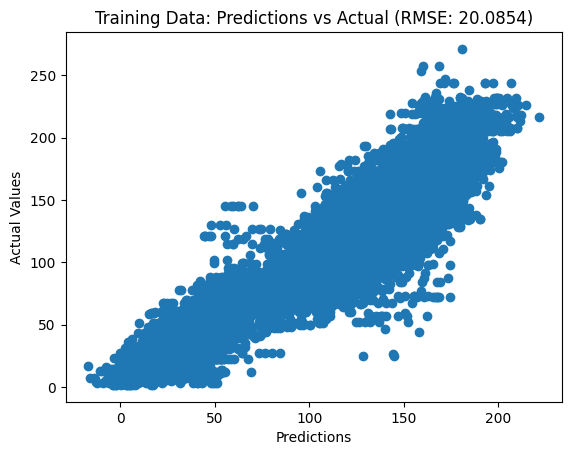

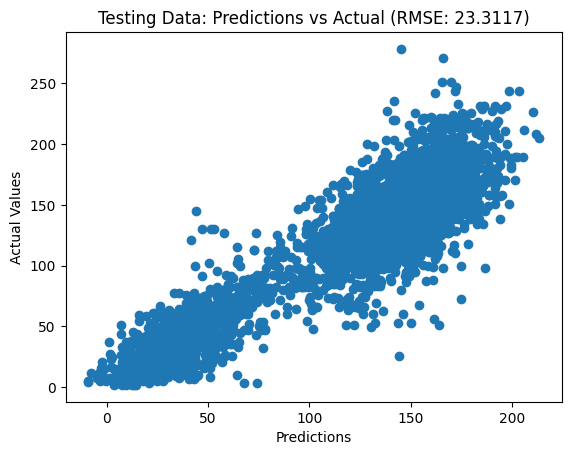

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

# Move predictions back to CPU
y_train_pred_cpu = y_train_pred.cpu().numpy()
y_test_pred_cpu = y_test_pred.cpu().numpy()

#inverse y_train and y_test
y_train_nn = scaler_yield.inverse_transform(y_train.reshape(-1, 1))
y_test_nn = scaler_yield.inverse_transform(y_test.reshape(-1, 1))

# inverse y_train_pred and y_test_pred
y_train_pred_cpu = scaler_yield.inverse_transform(y_train_pred_cpu)
y_test_pred_cpu = scaler_yield.inverse_transform(y_test_pred_cpu)

# Calculate RMSE for training and testing

train_rmse = np.sqrt(mean_squared_error(y_train_nn, y_train_pred_cpu))
test_rmse = np.sqrt(mean_squared_error(y_test_nn, y_test_pred_cpu))


#inverse

# Plot training predictions vs actual
plt.scatter(y_train_pred_cpu, y_train_nn)
plt.xlabel('Predictions')
plt.ylabel('Actual Values')
plt.title(f'Training Data: Predictions vs Actual (RMSE: {train_rmse:.4f})')
plt.show()

# Plot testing predictions vs actual
plt.scatter(y_test_pred_cpu, y_test_nn)
plt.xlabel('Predictions')
plt.ylabel('Actual Values')
plt.title(f'Testing Data: Predictions vs Actual (RMSE: {test_rmse:.4f})')
plt.show()



In [ ]:
!mkdir output

In [ ]:
#
predictions =  model(torch.tensor(val, dtype=torch.float32).to(device))
# predictions = scaler.fit_transform(predictions.reshape(-1, 1))
predictions = scaler_yield.inverse_transform(predictions.to('cpu').detach().numpy())
count = 'nn'

year = '2023'
file_path = f'test/Test/Test/GroundTruth'
data_truth = file_path + '/test_HIPS_HYBRIDS_2023_V2.3.csv'

# print(date_truth)

data_2023 = pd.read_csv(data_truth)
data_2023['yieldPerAcre'] = predictions
data_2023.to_csv(f'output/predictions_{year}_{count}4.csv', index=False)

#####LightGBM

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import lightgbm as lgb
import matplotlib.pyplot as plt

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.030444 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 11133
[LightGBM] [Info] Number of data points in the train set: 14080, number of used features: 62
[LightGBM] [Info] Start training from score 0.023660
Training until validation scores don't improve for 30 rounds
Did not meet early stopping. Best iteration is:
[993]	valid_0's rmse: 0.388927
Training RMSE: 16.1863
Test RMSE: 20.8329


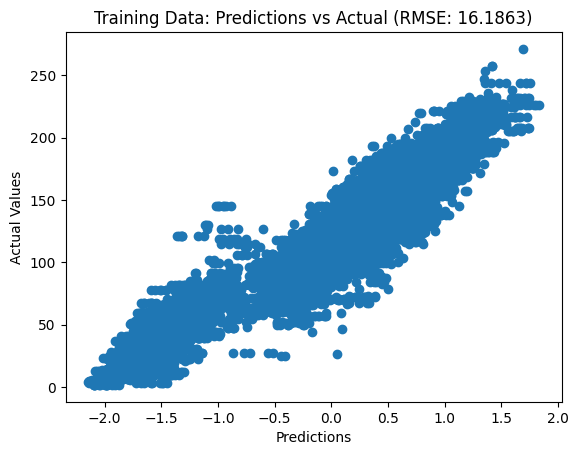

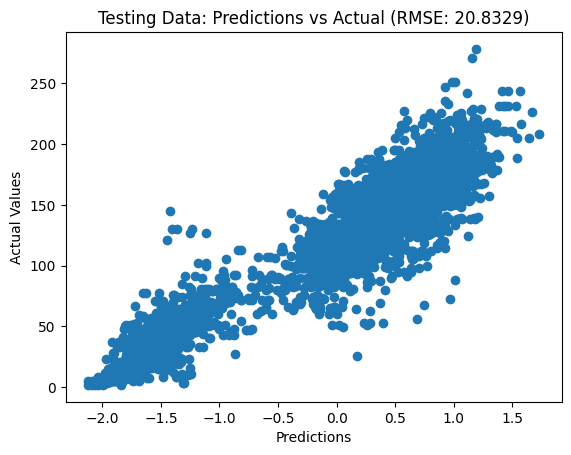

In [ ]:
train_data = lgb.Dataset(X_train, label=y_train)
valid_data = lgb.Dataset(X_test, label=y_test, reference=train_data)

params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'num_leaves': 50,  # Further reduced from 50
    'learning_rate': 0.01,  # Reduced from 0.02
    'feature_fraction': 0.8,  # Increased from 0.7
    'bagging_fraction': 0.9,  # Increased from 0.8
    'bagging_freq': 5,
    'lambda_l1': 1.0,  # Further increased regularization
    'lambda_l2': 1.0,  # Further increased regularization
    'seed': seed
}

# Train the model with modified parameters
num_round = 1000  # Increased from 1500
early_stopping_rounds = 30
bst = lgb.train(params, train_data, num_round, valid_sets=[valid_data], callbacks=[lgb.early_stopping(stopping_rounds=early_stopping_rounds)])



# bst = lgb.cv(params, train_data, num_round, nfold=5)
bst.save_model('model.txt', num_iteration=bst.best_iteration)

# Predict on the test set
y_test_pred = bst.predict(X_test, num_iteration=bst.best_iteration)
y_train_pred = bst.predict(X_train, num_iteration=bst.best_iteration)



#inverse  y_tra
#inverse y_train and y_test
y_train_gbm = scaler_yield.inverse_transform(y_train.reshape(-1, 1))
y_test_gbm = scaler_yield.inverse_transform(y_test.reshape(-1, 1))

#inverse y_train_pred and y_test_pred
y_train_pred_cpu = scaler_yield.inverse_transform(y_train_pred.reshape(-1, 1))
y_test_pred_cpu = scaler_yield.inverse_transform(y_test_pred.reshape(-1, 1))

# Calculate RMSE for training and testing sets
train_rmse = np.sqrt(mean_squared_error(y_train_gbm, y_train_pred_cpu))
test_rmse = np.sqrt(mean_squared_error(y_test_gbm, y_test_pred_cpu))


print(f'Training RMSE: {train_rmse:.4f}')
print(f'Test RMSE: {test_rmse:.4f}')

# Plot the predictions
# Training data predictions vs actual values
plt.scatter(y_train_pred, y_train_gbm)
plt.xlabel('Predictions')
plt.ylabel('Actual Values')
plt.title(f'Training Data: Predictions vs Actual (RMSE: {train_rmse:.4f})')
plt.show()

# Testing data predictions vs actual values
plt.scatter(y_test_pred, y_test_gbm)
plt.xlabel('Predictions')
plt.ylabel('Actual Values')
plt.title(f'Testing Data: Predictions vs Actual (RMSE: {test_rmse:.4f})')
plt.show()

In [ ]:
predictions = bst.predict(val, num_iteration=bst.best_iteration)
# predictions = scaler.fit_transform(predictions.reshape(-1, 1))
predictions = scaler_yield.inverse_transform(predictions.reshape(-1, 1))
count = 'gbm'

year = '2023'
file_path = f'test/Test/Test/GroundTruth'
data_truth = file_path + '/test_HIPS_HYBRIDS_2023_V2.3.csv'

data_2023 = pd.read_csv(data_truth)
data_2023['yieldPerAcre'] = predictions
data_2023.to_csv(f'output/predictions_{year}_{count}2.csv', index=False)



##### random forest

In [ ]:
#import tandom forest

# all_xg = all.reshape(all.shape[0], -1)
# # all_xg.shape
# val_xg = all_xg[-282:]
# X_xg = all_xg[:-282]

# X_train, X_test, y_train, y_test = train_test_split(X_xg, y, test_size=0.2, random_state=42)

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Create a Random Forest Regressor
# Create a Random Forest Regressor with additional hyperparameters
model = RandomForestRegressor(
    n_estimators=250,
    max_depth=500,
    min_samples_split=2,
    min_samples_leaf=1,
    random_state=42,
    n_jobs=-1,  # Use all available cores
    bootstrap=True,
    max_features='sqrt',  # Number of features to consider when looking for the best split
    min_weight_fraction_leaf=0.0,
    oob_score=True,  # Use out-of-bag samples to estimate the generalization accuracy
    max_leaf_nodes=None,  # Unlimited number of leaf nodes
    min_impurity_decrease=0.0
)
# Fit the model to the training data
# duplicate the datase
X_train = np.repeat(X_train, 3, axis=0)
y_train = np.repeat(y_train, 3, axis=0)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=500, max_features='sqrt', n_estimators=250,
                      n_jobs=-1, oob_score=True, random_state=42)

In [ ]:
prediction = model.predict(X_test)
#import scaler
from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
# prediction = scaler.fit_transform(prediction.reshape(-1, 1))

prediction = scaler_yield.inverse_transform(prediction.reshape(-1, 1))

y_test_inv = scaler_yield.inverse_transform(y_test.reshape(-1, 1))

# #mse error
from sklearn.metrics import mean_squared_error
mse = np.sqrt(mean_squared_error(y_test_inv, prediction))
print(f"Mean Squared Error: {mse}")




Mean Squared Error: 20.633970889981473


In [ ]:
predictions = model.predict(val)
# predictions = scaler.fit_transform(predictions.reshape(-1, 1))
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
count = 'randomFor'

year = '2023'
file_path = f'validation/{year}/{year}/'
# date_collected_path = f'predictions_{year}_{count}.csv'
data_truth = file_path + 'GroundTruth/val_HIPS_HYBRIDS_2023_V2.3.csv'

data_2023 = pd.read_csv(data_truth)
data_2023['yieldPerAcre'] = predictions
data_2023.to_csv(f'predictions_{year}_{count}.csv', index=False)

##### XGBOOST

In [ ]:
# all_xg = all.reshape(all.shape[0], -1)
# # all_xg.shape
# val_xg = all_xg[-282:]
# X_xg = all_xg[:-282]

# X_train, X_test, y_train, y_test = train_test_split(X_xg, y, test_size=0.2, random_state=42

#xgboost
import xgboost as xgb
# Define the XGBoost model with additional parameters
model = xgb.XGBRegressor(
    objective="reg:squarederror",
    random_state=42,
    n_estimators=200,
    learning_rate=0.05,
    max_depth=6,
    subsample=0.8,
    colsample_bytree=0.8,
    gamma=0.1,
    reg_alpha=0.1,
    reg_lambda=1.0
)

# Train the model
model.fit(X_train, y_train, eval_set=[(X_test, y_test)], verbose=True)

# Make predictions on the test set
predictions = model.predict(X_test)


In [ ]:
prediction = model.predict(X_test)

prediction = scaler_yield.inverse_transform(prediction.reshape(-1, 1))

y_test_inv = scaler_yield.inverse_transform(y_test.reshape(-1, 1))

# #mse error
from sklearn.metrics import mean_squared_error
mse = np.sqrt(mean_squared_error(y_test_inv, prediction))
print(f"Mean Squared Error: {mse}")

Mean Squared Error: 21.127224040454074


In [ ]:
predictions = model.predict(val)
# predictions = scaler.fit_transform(predictions.reshape(-1, 1))
predictions = scaler.inverse_transform(predictions.reshape(-1, 1))
count = 'XGBoost'

year = '2023'
file_path = f'validation/{year}/{year}/'
# date_collected_path = f'predictions_{year}_{count}.csv'
data_truth = file_path + 'GroundTruth/val_HIPS_HYBRIDS_2023_V2.3.csv'

data_2023 = pd.read_csv(data_truth)
data_2023['yieldPerAcre'] = predictions
data_2023.to_csv(f'predictions_{year}_{count}.csv', index=False)

##### new data

In [ ]:
df = pd.read_parquet('processed_3t_20k.parquet', engine='pyarrow')

# reshape predictor to 1, 93

df['Predcitors'] = df['Predcitors'].apply(lambda x: np.array(x).reshape(1, 62))


#conver to numpy array
all = np.array(df['Predcitors'].tolist())
val = all[-288:]
X = all[:-288]
all_y = np.array(df['Yield'].tolist())
y = all_y[:-288]
y_val = all_y[-288:]



#split ninto train and tes
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14080, 1, 62), (3520, 1, 62), (14080,), (3520,))

#####simple lstm

In [ ]:
print(np.isnan(X_train).any(), np.isnan(y_train).any())
print(np.isinf(X_train).any(), np.isinf(y_train).any())


False False
False False


In [ ]:
X_train[1230].max()

1.7173614501953125

In [ ]:
import numpy as np
from tensorflow.keras.layers import Input, Dropout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras.optimizers import Adam
#import load weight

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=42)

# Define the LSTM model
model = Sequential()
model.add(Input(shape=(1, 62)))
model.add(LSTM(64, return_sequences=True))  # First LSTM layer
model.add(Dropout(0.2))
model.add(LSTM(32))  # Second LSTM layer
model.add(Dropout(0.2))
model.add(Dense(16, activation='relu'))  # Additional Dense layer
model.add(Dense(1))


# Compile the model
model.compile(optimizer=Adam(learning_rate=0.0005), loss='mse')

# Define callbacks
checkpoint_filepath = 'best_lstm_model.keras'
model_checkpoint = ModelCheckpoint(filepath=checkpoint_filepath, monitor='val_loss', save_best_only=True, mode='min')
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
from tensorflow.keras.callbacks import ReduceLROnPlateau

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=1e-6)
# Train the model with validation split and callbacks
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2, callbacks=[model_checkpoint, early_stopping, reduce_lr])

# Load the best saved model
model.load_weights(checkpoint_filepath)

# Evaluate the best model on the test set
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")

# Example prediction using the best model
predictions = model.predict(X_test)

# Print the validation loss history
val_loss = history.history['val_loss']
print(f"Validation Loss: {val_loss}")

Epoch 1/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 6s 7ms/step - loss: 0.8810 - val_loss: 0.2978 - learning_rate: 5.0000e-04
Epoch 2/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.3022 - val_loss: 0.2696 - learning_rate: 5.0000e-04
Epoch 3/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2780 - val_loss: 0.2536 - learning_rate: 5.0000e-04
Epoch 4/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2561 - val_loss: 0.2407 - learning_rate: 5.0000e-04
Epoch 5/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2414 - val_loss: 0.2305 - learning_rate: 5.0000e-04
Epoch 6/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 0.2381 - val_loss: 0.2224 - learning_rate: 5.0000e-04
Epoch 7/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2206 - val_loss: 0.2161 - learning_rate: 5.0000e-04
Epoch 8/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.2130 - val_loss: 0.2143 - learning_rate: 5.0000e-04
Epoch 9/100
352/352 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 0.2082 - val_loss: 

In [ ]:
predictions = model.predict(val)
predictions = scaler.inverse_transform(predictions)
count = 'lSTM'

year = '2023'
file_path = f'validation/{year}/{year}/'
# date_collected_path = f'predictions_{year}_{count}.csv'
data_truth = file_path + 'GroundTruth/val_HIPS_HYBRIDS_2023_V2.3.csv'

data_2023 = pd.read_csv(data_truth)
data_2023['yieldPerAcre'] = predictions
data_2023.to_csv(f'predictions_{year}_{count}.csv', index=False)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


#####GRU

In [ ]:
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the improved GRU model
model = Sequential()
model.add(GRU(64, return_sequences=True, input_shape=(3, 93)))  # Increased units
model.add(BatchNormalization())
model.add(Dropout(0.3))  # Increased dropout
model.add(GRU(64))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))  # Additional dense layer
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_gru_model.keras', monitor='val_loss', save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

# Train the model with validation split and callbacks
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2, callbacks=[early_stopping, model_checkpoint, reduce_lr])

# Example prediction
predictions = model.predict(X_test)

# Print the validation loss
val_loss = history.history['val_loss']
print(f"Validation Loss: {val_loss}")

# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")

#lkoad best miodel
from tensorflow.keras.models import load_model
model = load_model('best_gru_model.keras')

Epoch 1/100


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


351/351 ━━━━━━━━━━━━━━━━━━━━ 11s 14ms/step - loss: 1.3344 - val_loss: 0.4195 - learning_rate: 0.0010
Epoch 2/100
351/351 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.5357 - val_loss: 0.3573 - learning_rate: 0.0010
Epoch 3/100
351/351 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.4080 - val_loss: 0.3214 - learning_rate: 0.0010
Epoch 4/100
351/351 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step - loss: 0.3431 - val_loss: 0.3086 - learning_rate: 0.0010
Epoch 5/100
351/351 ━━━━━━━━━━━━━━━━━━━━ 4s 8ms/step - loss: 0.3275 - val_loss: 0.3079 - learning_rate: 0.0010
Epoch 6/100
351/351 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.3047 - val_loss: 0.2918 - learning_rate: 0.0010
Epoch 7/100
351/351 ━━━━━━━━━━━━━━━━━━━━ 6s 10ms/step - loss: 0.2978 - val_loss: 0.2952 - learning_rate: 0.0010
Epoch 8/100
351/351 ━━━━━━━━━━━━━━━━━━━━ 5s 8ms/step - loss: 0.2732 - val_loss: 0.2789 - learning_rate: 0.0010
Epoch 9/100
351/351 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.2636 - val_loss: 0.2845 - learning_rate: 0.0010
Epoch 10/

In [ ]:
predictions = model.predict(val)
predictions = scaler.inverse_transform(predictions)
count = 'GRU'

year = '2023'
file_path = f'validation/{year}/{year}/'
# date_collected_path = f'predictions_{year}_{count}.csv'
data_truth = file_path + 'GroundTruth/val_HIPS_HYBRIDS_2023_V2.3.csv'

data_2023 = pd.read_csv(data_truth)
data_2023['yieldPerAcre'] = predictions
data_2023.to_csv(f'predictions_{year}_{count}.csv', index=False)

9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 58ms/step


#####bi-GRU

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GRU, Dense, Dropout, BatchNormalization, Bidirectional
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
#import loadmodel
from tensorflow.keras.models import load_model
from sklearn.model_selection import train_test_split

# Define the Bidirectional GRU model
model = Sequential()
model.add(Bidirectional(GRU(64, return_sequences=True), input_shape=(3, 61)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Bidirectional(GRU(64)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=30, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_bidirectional_gru_model.keras', monitor='val_loss', save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

# Train the model with validation split and callbacks
history = model.fit(X_train, y_train, epochs=200, batch_size=15, validation_split=0.15, callbacks=[early_stopping, model_checkpoint, reduce_lr])

# Load the best saved model
best_model = load_model('best_bidirectional_gru_model.keras')

# Evaluate the best model on the test set
test_loss = best_model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/bidirectional.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/200
848/848 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - loss: 0.9605 - val_loss: 0.3146 - learning_rate: 0.0010
Epoch 2/200
848/848 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - loss: 0.3716 - val_loss: 0.2596 - learning_rate: 0.0010
Epoch 3/200
848/848 ━━━━━━━━━━━━━━━━━━━━ 8s 8ms/step - loss: 0.3040 - val_loss: 0.2487 - learning_rate: 0.0010
Epoch 4/200
848/848 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - loss: 0.2767 - val_loss: 0.2316 - learning_rate: 0.0010
Epoch 5/200
848/848 ━━━━━━━━━━━━━━━━━━━━ 7s 8ms/step - loss: 0.2616 - val_loss: 0.2225 - learning_rate: 0.0010
Epoch 6/200
848/848 ━━━━━━━━━━━━━━━━━━━━ 11s 10ms/step - loss: 0.2453 - val_loss: 0.2155 - learning_rate: 0.0010
Epoch 7/200
848/848 ━━━━━━━━━━━━━━━━━━━━ 9s 11ms/step - loss: 0.2415 - val_loss: 0.2090 - learning_rate: 0.0010
Epoch 8/200
848/848 ━━━━━━━━━━━━━━━━━━━━ 8s 10ms/step - loss: 0.2327 - val_loss: 0.2061 - learning_rate: 0.0010
Epoch 9/200
848/848 ━━━━━━━━━━━━━━━━━━━━ 11s 11ms/step - loss: 0.2239 - val_loss: 0.2053 - learning_rate

In [ ]:
#import loadmodel
from tensorflow.keras.models import load_model
model = load_model('best_bidirectional_gru_model.keras')

# Evaluate the best model on the test set
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")

# Example prediction using the best model
predictions = model.predict(X_test)
# print(predictions)

predictions = model.predict(val)
predictions = scaler_yield.inverse_transform(predictions)
count = 'Bi-GRU'

year = '2023'
file_path = f'validation/{year}/{year}/'
# date_collected_path = f'predictions_{year}_{count}.csv'
data_truth = file_path + 'GroundTruth/val_HIPS_HYBRIDS_2023_V2.3.csv'

data_2023 = pd.read_csv(data_truth)
data_2023['yieldPerAcre'] = predictions
data_2023.to_csv(f'predictions_{year}_{count}.csv', index=False)


83/83 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1639
Test Loss: 0.15511004626750946
83/83 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


#####transformer

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, LayerNormalization, MultiHeadAttention, Dropout, Add
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np
#import globalaverage[pool
from tensorflow.keras.layers import GlobalAveragePooling1D


def transformer_encoder(inputs, head_size, num_heads, ff_dim, dropout=0):
    # Normalization and Attention
    x = LayerNormalization(epsilon=1e-6)(inputs)
    x = MultiHeadAttention(key_dim=head_size, num_heads=num_heads, dropout=dropout)(x, x)
    x = Dropout(dropout)(x)
    res = Add()([x, inputs])

    # Feed Forward Part
    x = LayerNormalization(epsilon=1e-6)(res)
    x = Dense(ff_dim, activation="relu")(x)
    x = Dropout(dropout)(x)
    x = Dense(inputs.shape[-1])(x)
    return Add()([x, res])

def build_model(input_shape, head_size, num_heads, ff_dim, num_transformer_blocks, mlp_units, dropout=0, mlp_dropout=0):
    inputs = Input(shape=input_shape)
    x = inputs
    for _ in range(num_transformer_blocks):
        x = transformer_encoder(x, head_size, num_heads, ff_dim, dropout)

    x = GlobalAveragePooling1D()(x)
    for dim in mlp_units:
        x = Dense(dim, activation="relu")(x)
        x = Dropout(mlp_dropout)(x)
    outputs = Dense(1)(x)
    return Model(inputs, outputs)

input_shape = (3, 93)
model = build_model(input_shape, head_size=64, num_heads=4, ff_dim=64, num_transformer_blocks=4, mlp_units=[128], dropout=0.3, mlp_dropout=0.4)

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
model_checkpoint = ModelCheckpoint('best_transformer_model.keras', monitor='val_loss', save_best_only=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=5, min_lr=0.001)

# Train the model with validation split and callbacks
history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2, callbacks=[early_stopping, model_checkpoint, reduce_lr])

# Load the best saved model
best_model = load_model('best_transformer_model.keras')

# Evaluate the best model on the test set
test_loss = best_model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")

# Example prediction using the best model
predictions = best_model.predict(X_test)
print(predictions)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import load_model
model = load_model('best_transformer_model.keras')

# Evaluate the best model on the test set
test_loss = model.evaluate(X_test, y_test)
print(f"Test Loss: {test_loss}")

predictions = model.predict(val)
predictions = scaler.inverse_transform(predictions)
count = 'transformer'

year = '2023'
file_path = f'validation/{year}/{year}/'
# date_collected_path = f'predictions_{year}_{count}.csv'
data_truth = file_path + 'GroundTruth/val_HIPS_HYBRIDS_2023_V2.3.csv'

data_2023 = pd.read_csv(data_truth)
data_2023['yieldPerAcre'] = predictions
data_2023.to_csv(f'predictions_{year}_{count}.csv', index=False)

110/110 ━━━━━━━━━━━━━━━━━━━━ 2s 14ms/step - loss: 0.1745
Test Loss: 0.1801590919494629
9/9 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step


#####test
**bold text**

In [ ]:
prediction = model.predict(X_test)
prediction = scaler_yield.inverse_transform(prediction)
y_test_inv = scaler_yield.inverse_transform(y_test.reshape(-1, 1))

#mse error
from sklearn.metrics import mean_squared_error
mse = np.sqrt(mean_squared_error(y_test_inv, prediction))
print(f"Mean Squared Error: {mse}", len(prediction))

110/110 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Mean Squared Error: 22.898098116297042 3520


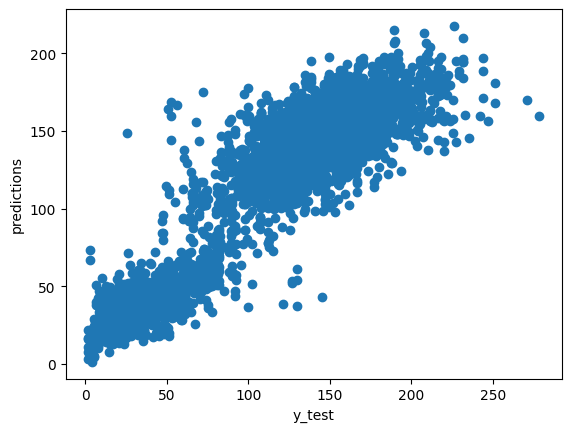

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(y_test_inv, prediction)
plt.xlabel('y_test')
plt.ylabel('predictions')
plt.show()

440/440 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Mean Squared Error: 19.466252284460765


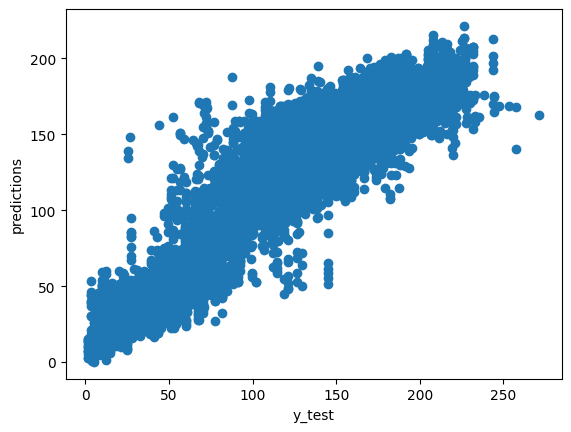

In [ ]:
#pre ion val
predictions = model.predict(X_train)
predictions = scaler_yield.inverse_transform(predictions)
# predictions = scaler.fit_transform(predictions.reshape(-1, 1))
y_train_inv = scaler_yield.inverse_transform(y_train.reshape(-1, 1))

#root mean squared
from sklearn.metrics import mean_squared_error
mse = np.sqrt(mean_squared_error(y_train_inv, predictions))
print(f"Mean Squared Error: {mse}")

plt.scatter(y_train_inv, predictions)
plt.xlabel('y_test')
plt.ylabel('predictions')
plt.show()

In [ ]:
predictions = model.predict(val)
# predictions = scaler.fit_transform(predictions.reshape(-1, 1))
predictions = scaler_yield.inverse_transform(predictions)
count = 'lstm'

year = '2023'
file_path = f'test/Test/Test/GroundTruth'
data_truth = file_path + '/test_HIPS_HYBRIDS_2023_V2.3.csv'

data_2023 = pd.read_csv(data_truth)
data_2023['yieldPerAcre_GRU'] = predictions
data_2023.to_csv(f'output/predictions_{year}_{count}.csv', index=False)

9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


In [ ]:
predictions

#Transformaation- reverse

In [ ]:
# read all images through glob and concat

import ast
image_path = 'validation/2023/2023/Satellite/'
images = []

for time_point in os.listdir(image_path):
    time_point_path = os.path.join(image_path, time_point)
    if os.path.isdir(time_point_path):  # Check if it's a directory
        # Get all image file paths in the directory
        image_files = glob.glob(os.path.join(time_point_path, '*.TIF'))
        # Sort the image file paths
        image_files.sort()
        # Append sorted file paths to the list
        images.append(image_files)

# Transpose the list of lists to align time points correctly
transposed_images = list(zip(*images))

new_df = pd.DataFrame({'File_Path': transposed_images})


# new_df['File_Path'] = new_df['File_Path'].apply(ast.literal_eval)
scaler = MinMaxScaler()

def row(data_):
    result = []
    for item in data_:

        tensor = satelliteimage_with_cnn(item)
        tensor = tensor.reshape(-1, 1)
        tensor = scaler.fit_transform(tensor)

        result.append(tensor)
    return np.array(result).reshape(3, -1)


new_df['Features'] = new_df['File_Path'].apply(row)


In [ ]:
new_df

,File_Path
0,(validation/2023/2023/Satellite/TP2/Ames-TP2-2...
1,(validation/2023/2023/Satellite/TP2/Ames-TP2-2...
2,(validation/2023/2023/Satellite/TP2/Ames-TP2-2...
3,(validation/2023/2023/Satellite/TP2/Ames-TP2-2...
4,(validation/2023/2023/Satellite/TP2/Ames-TP2-2...
...,...
277,(validation/2023/2023/Satellite/TP2/Ames-TP2-2...
278,(validation/2023/2023/Satellite/TP2/Ames-TP2-2...
279,(validation/2023/2023/Satellite/TP2/Ames-TP2-2...
280,(validation/2023/2023/Satellite/TP2/Ames-TP2-2...


In [ ]:
import ast

# new_df['File_Path'] = new_df['File_Path'].apply(ast.literal_eval)
scaler = MinMaxScaler()

def row(data_):
    result = []
    for item in data_:

        tensor = satelliteimage_with_cnn(item)
        tensor = tensor.reshape(-1, 1)
        tensor = scaler.fit_transform(tensor)

        result.append(tensor)
    return np.array(result).reshape(3, -1)


new_df['Features'] = new_df['File_Path'].apply(row)

In [ ]:
new_df.iloc[0]['Features']

array([[0.4631084 , 0.46320226, 0.46156908, 0.46528054, 0.46501295,
        0.46672747, 0.46361935, 0.4720194 , 0.46554859, 0.32482256,
        0.66131717, 0.3650837 , 0.58815496, 0.2150686 , 0.35448696,
        0.17352953, 0.35002469, 0.54697576, 0.45484939, 0.52350947,
        0.64222529, 0.06263622, 0.2081808 , 0.61658694, 0.87017324,
        0.41951383, 0.6652702 , 0.53877698, 0.25408395, 0.        ,
        0.43082995, 0.56443576, 1.        , 0.01592572, 0.41762927,
        0.69153897, 0.34772472, 0.74923945, 0.58482488, 0.55167591,
        0.22482954, 0.7797981 , 0.9028458 , 0.75635889, 0.80604207,
        0.80365695, 0.21219473, 0.49285957, 0.52519161, 0.30805938,
        0.8686502 , 0.58341359, 0.88259132, 0.2209194 , 0.10190307,
        0.59567768, 0.78097002, 0.66946841, 0.26302631, 0.37474436,
        0.61945403, 0.5118912 , 0.55595631, 0.19714978, 0.57128759,
        0.96190489, 0.51287766, 0.66316828, 0.31061887, 0.42710008,
        0.36256246, 0.62483161, 0.75850749],
   

In [ ]:
#save to pacquet
#convert features to 1D
new_df['Features'] = new_df['Features'].apply(lambda x: x.flatten())
new_df.to_parquet('validation_3t_2023.parquet', engine='pyarrow')

#STOP

In [ ]:
year = '2023'
file_path = f'validation/{year}/{year}/GroundTruth/'
date_collected_path = file_path + 'val_HIPS_HYBRIDS_2023_V2.3.csv'
# data_truth = [file_path + 'GroundTruth/train_HIPS_HYBRIDS_2023_V2.3.csv' if year == '2023' else file_path + 'GroundTruth/HYBRID_HIPS_V3.5_ALLPLOTS.csv']

data_2023 = pd.read_csv(date_collected_path)
# data_2023 = data_2023.dropna(subset=['genotype', 'yieldPerAcre'])

In [ ]:
data_2023 = pd.get_dummies(data_2023, columns=['location', 'nitrogenTreatment'])
dummy_columns = [col for col in data_2023.columns if col.startswith('location_') or col.startswith('nitrogenTreatment_')]

# Convert only the dummy variable columns to integers
data_cat[dummy_columns] = data_cat[dummy_columns].astype(int)

In [ ]:
data_2023[['irrigationProvided_tr', 'poundsOfNitrogenPerAcre_tr']] = pt.fit_transform(data_2023[['irrigationProvided', 'poundsOfNitrogenPerAcre']])

#satandarize yield
# scaler = StandardScaler()
# data_cat[['yieldPerAcre_tr']] = scaler.fit_transform(data_cat[['yieldPerAcre']])

In [ ]:
data_2023.head()

,qrCode,location,irrigationProvided,nitrogenTreatment,poundsOfNitrogenPerAcre,experiment,plotLength,block,row,range,plotNumber,genotype,plantingDate,totalStandCount,daysToAnthesis,GDDToAnthesis,yieldPerAcre,irrigationProvided_tr,poundsOfNitrogenPerAcre_tr
0,23-A-1725451,Ames,0,Low,75,2315,17.5,1,11,12,1725451,PHN46 X PHB47,5/19/23,NaN,NaN,NaN,NaN,0.0,-1.353373
1,23-A-1725452,Ames,0,Low,75,2315,17.5,1,13,3,1725452,B73 X MO17,5/19/23,NaN,NaN,NaN,NaN,0.0,-1.353373
2,23-A-1725454,Ames,0,Low,75,2315,17.5,1,13,18,1725454,B73 X PHM49,5/19/23,NaN,NaN,NaN,NaN,0.0,-1.353373
3,23-A-1725460,Ames,0,Low,75,2315,17.5,1,15,2,1725460,LH185 X LH82,5/19/23,NaN,NaN,NaN,NaN,0.0,-1.353373
4,23-A-1725461,Ames,0,Low,75,2315,17.5,1,15,5,1725461,2369 X PHN82,5/19/23,NaN,NaN,NaN,NaN,0.0,-1.353373
